In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


In [123]:
df = pd.read_csv("~/Downloads/gender_classification_v7.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [124]:
#ANALYSIS

In [125]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [126]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [127]:
#Analysis

In [128]:
#This Barplot is showing the relationship between gender (Male and Female) and long hair. 
#It is seen from the barplot that both Female and Male have equal amount of long hair 

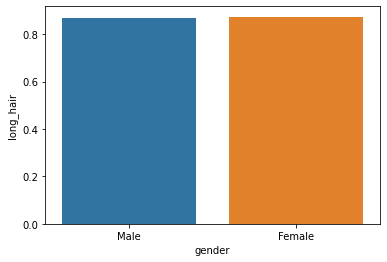

In [129]:
sns.barplot(x="gender", y="long_hair", ci = None, data=df);

In [130]:
#This Barplot is showing the relationship between gender (Male and Female) and wide nose. 
#It is seen from the barplot that more Males have a wide nose than Females.

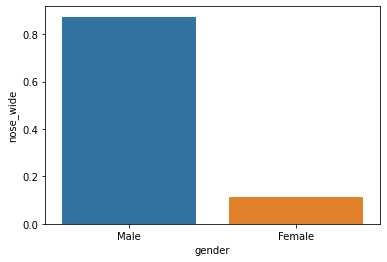

In [131]:
sns.barplot(x="gender", y="nose_wide", ci = None, data=df);

In [132]:
#This Barplot is showing the relationship between gender (Male and Female) and wide nose. 
#It is seen from the barplot that more Males slightly have a larger forehead width per cm  than Females.

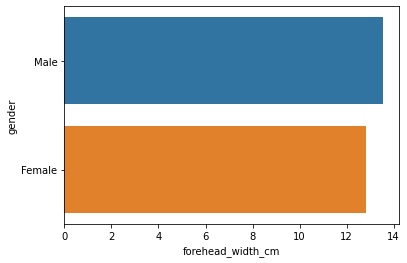

In [133]:
sns.barplot(x="forehead_width_cm", y="gender", ci = None, data=df);

In [134]:
#This Barplot is showing the relationship between gender (Male and Female) and Thin lips. 
#It is seen from the barplot that more Males have thin lips than Females.

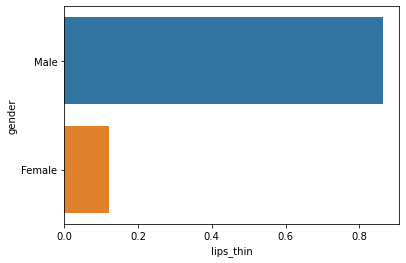

In [135]:
sns.barplot(x="lips_thin", y="gender", ci = None, data=df);

In [136]:
#This Barplot is showing the relationship between gender (Male and Female) and nose to lip distance. 
#It is seen from the barplot that more Males have a longer distance between the nose and the lips than Females.

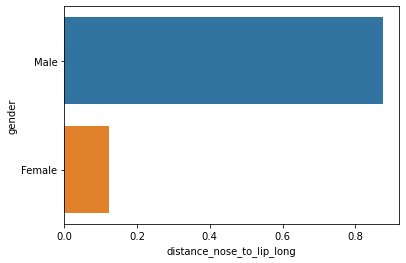

In [137]:
sns.barplot(x="distance_nose_to_lip_long", y="gender", ci = None, data=df);

In [138]:
lst = []
for change in range(len(df['gender'])):
    if df['gender'][change] == 'Male':
        lst.append("1")
    else: 
        df['gender'][change] == 'Female'
        lst.append('0')
    
df['gender'] = lst

In [139]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


<AxesSubplot:>

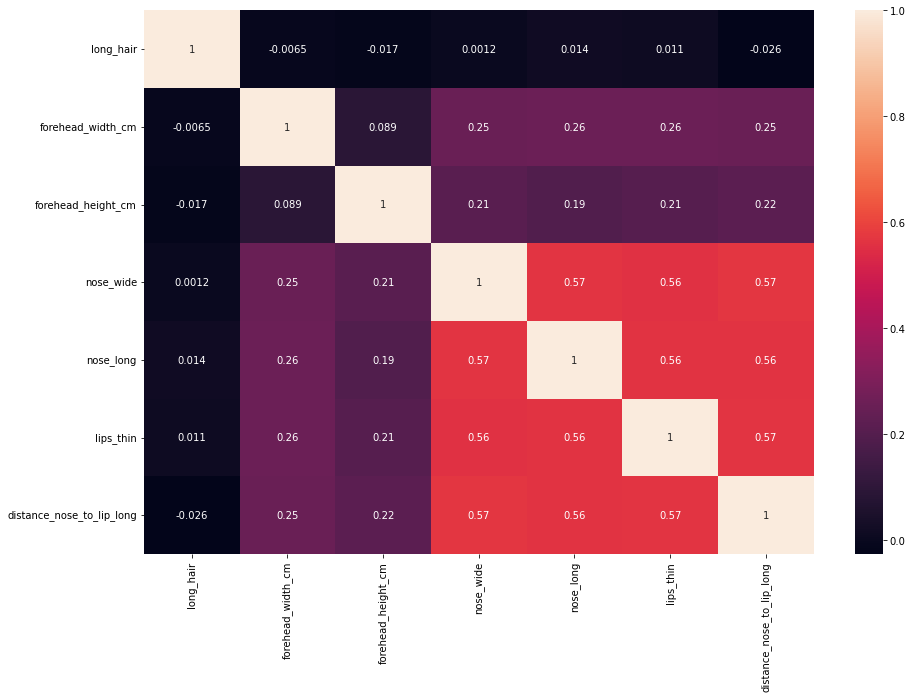

In [140]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [141]:
y = df['gender']
X = df.drop(columns=['gender'], axis=1)

X.shape

(5001, 7)

In [142]:
y.shape

(5001,)

In [143]:
X_train, X_test,  y_train, y_test= train_test_split(X, y, test_size = 0.20, random_state = 45, train_size = 0.80)

In [144]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scale = MinMaxScaler() 
X_train_norm = pd.DataFrame(std_scale.fit_transform(X_train))

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_norm, y_train, test_size = .20, random_state = 45)
X_train_

,0,1,2,3,4,5,6
3803,0.0,0.902439,0.95,1.0,1.0,1.0,1.0
980,1.0,0.268293,0.80,1.0,1.0,1.0,1.0
46,1.0,0.317073,0.40,0.0,1.0,0.0,0.0
3072,1.0,0.634146,0.25,0.0,0.0,0.0,0.0
3270,0.0,0.292683,0.15,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
3616,1.0,0.780488,0.45,1.0,1.0,1.0,0.0
1916,0.0,0.268293,0.05,1.0,1.0,1.0,1.0
1667,1.0,0.926829,0.45,1.0,0.0,1.0,1.0
2462,1.0,0.268293,0.10,1.0,0.0,0.0,0.0


In [145]:
X_train_.shape

(3200, 7)

In [146]:
y_train_.shape

(3200,)

In [147]:
pca = PCA(n_components= 7)
model = pca.fit(X_train_)
PCA(n_components= 7)
print(model.explained_variance_ratio_)         

[0.54432155 0.09390792 0.08940675 0.08627195 0.08133573 0.05367409
 0.05108201]


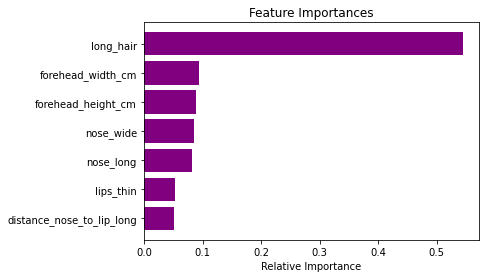

In [148]:
features = df.columns
importances = model.explained_variance_ratio_
indices = np.argsort(importances)[-10:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [149]:
model = LogisticRegression()
gen = model.fit(X_train_,  y_train_)
gen

LogisticRegression()

In [150]:
coef_deter = gen.score(X_train_, y_train_)
coef_deter

0.9696875

In [151]:
1 - (1-gen.score(X_train_, y_train_))*(len(y_train_)-1)/(len(y_train_)-X_train_.shape[1]-1)

0.9696210252192983

In [152]:
y_predict = gen.predict(X_test_)

In [153]:
cf_matrix = confusion_matrix(y_test_, y_predict)
print(cf_matrix)

[[373   9]
 [ 17 401]]


In [154]:
cv = RepeatedKFold(n_splits = 10, n_repeats =4, random_state =1)
cv

RepeatedKFold(n_repeats=4, n_splits=10, random_state=1)

In [155]:
score = cross_val_score(gen, X_test_, y_test_, scoring = "accuracy", cv = cv, n_jobs = 1, error_score = "raise")
np.mean(score)

0.9600000000000002

In [ ]:
#The Model have a 96% accuracy in classifying gender(Male, Female) based on the dependent variables in the dataset